In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load in data
df_all = pd.read_csv("raw_data.csv",low_memory=False)
df_all.shape

(259558, 22)

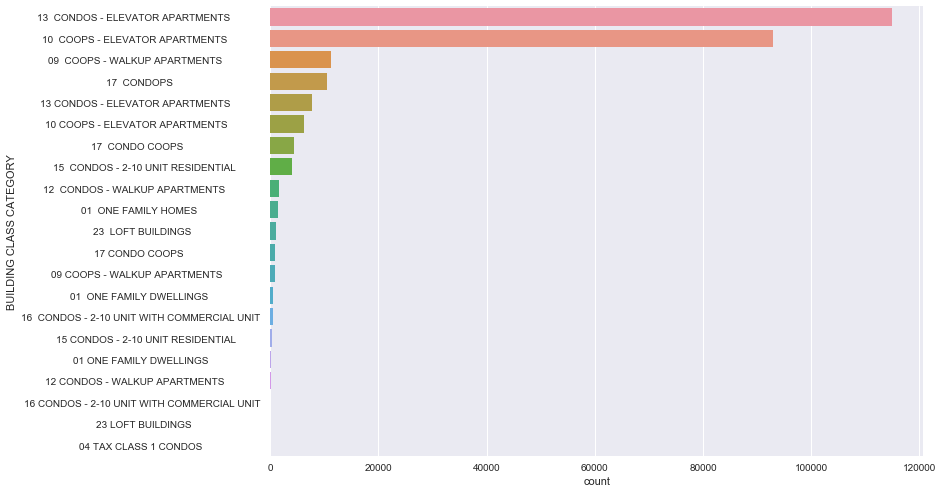

In [3]:
# look at the category distributions
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(y="BUILDING CLASS CATEGORY", data=df_all,
              order = df_all['BUILDING CLASS CATEGORY'].value_counts().index)

We see most of the sales in NYC are elevator apartments, which is in line with people's needs nowadays

In [4]:
# only need CONDO data
all_category = list(df_all['BUILDING CLASS CATEGORY'].unique())

In [5]:
# only check NYC condo
only_condo = [i for i in all_category if 'CONDO' in i and 'COOP' not in i and 'CONDOPS' not in i]

In [6]:
df_condo = df_all[df_all['BUILDING CLASS CATEGORY'].isin(only_condo)]

In [7]:
# Add unique identifier for condos: block + lot
col_block_lot = df_condo.apply(lambda row: str(row.BLOCK) + str(row.LOT), axis=1)
df_condo = df_condo.assign(IDENTIFIER=col_block_lot.values)

In [8]:
# remove the price outliers from the data -- 200k as minimum and 5 million as maximum 
df_condo = df_condo[df_condo['SALE PRICE'].between(200000, 10000000)]

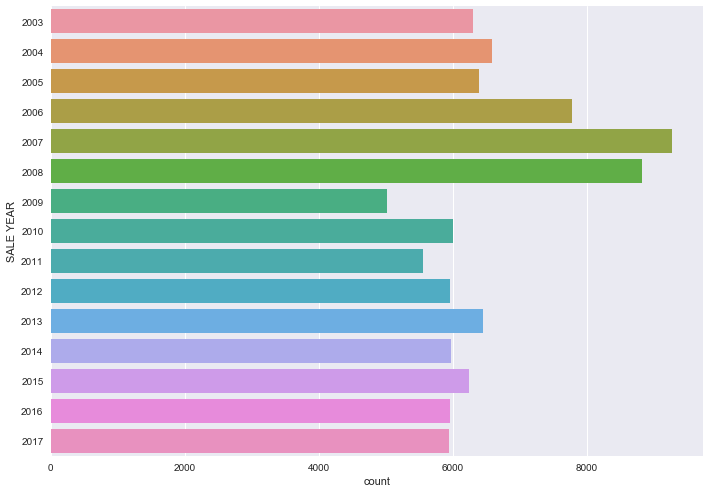

In [9]:
ax = sns.countplot(y="SALE YEAR", data=df_condo)

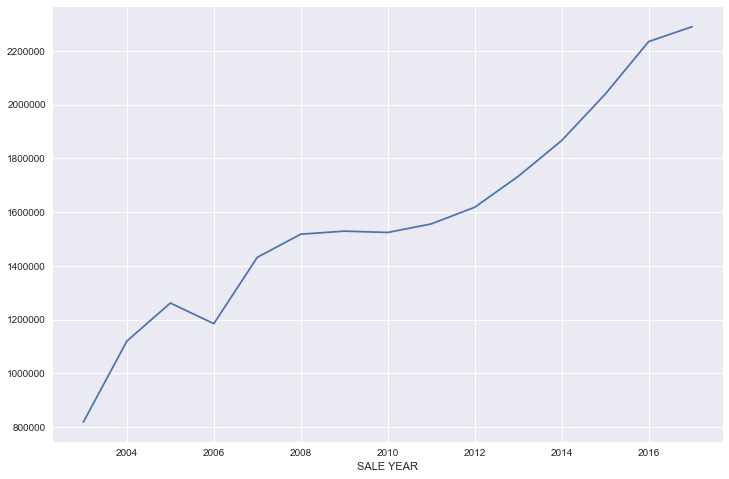

In [10]:
df_condo.groupby('SALE YEAR').mean()['SALE PRICE'].plot(figsize=(12, 8))

Housing price dropped slightly from 2005 to 2006 and remain flat during credit crisis, but during all other periods it's been growing strongly. 

In [11]:
# Cclculate the price change for each apt
df_condo['price_change'] = df_condo.sort_values(['IDENTIFIER','SALE YEAR'],ascending=[True,True]).groupby(['IDENTIFIER'])['SALE PRICE'].apply(lambda x: x.pct_change())

In [12]:
# Cclculate the years past for each sale to take place
df_condo['year_pass'] = df_condo.sort_values(['IDENTIFIER','SALE YEAR'],ascending=[True,True]).groupby(['IDENTIFIER'])['SALE YEAR'].apply(lambda x: x.diff())

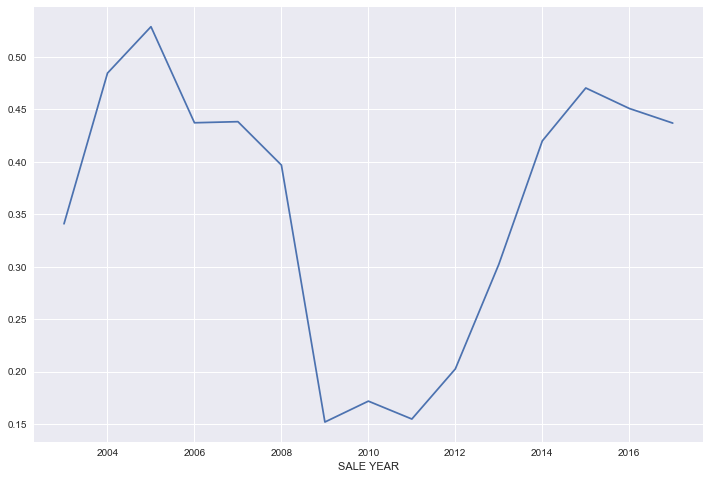

In [13]:
df_condo.groupby('SALE YEAR').mean()['price_change'].plot(figsize=(12, 8))